In [1]:
import pandas as pd

In [3]:
# load the data into a pandas dataframe
df = pd.read_csv('volume_pressure_data.csv')

# display the first three rows of data
display(df.iloc[range(3)])

,Volume,Pressure
0,48,29.1250
1,46,30.5625
2,44,31.9375


In [59]:
# calculate statistics for volume
v_mean = df['Volume'].mean()  # mean
v_median = df['Volume'].median()  # median
v_std = df['Volume'].std()  # standard deviation
print('Volume Statistics: \n * mean: ', v_mean, '\n * median: ', v_median, '\n * standard deviation: ', v_std)

# calculate statistics for pressure
p_mean = df['Pressure'].mean()  # mean
p_median = df['Pressure'].median()  # median
p_std = df['Pressure'].std()  # standard deviation
print('Pressure Statistics: \n * mean: ', p_mean, '\n * median: ', p_median, '\n * standard deviation: ', p_std)

Volume Statistics: 
 * mean:  27.12 
 * median:  24.0 
 * standard deviation:  11.192705958197358
Pressure Statistics: 
 * mean:  61.5075 
 * median:  58.8125 
 * standard deviation:  25.84054620407626


In [17]:
import matplotlib.pyplot as plt

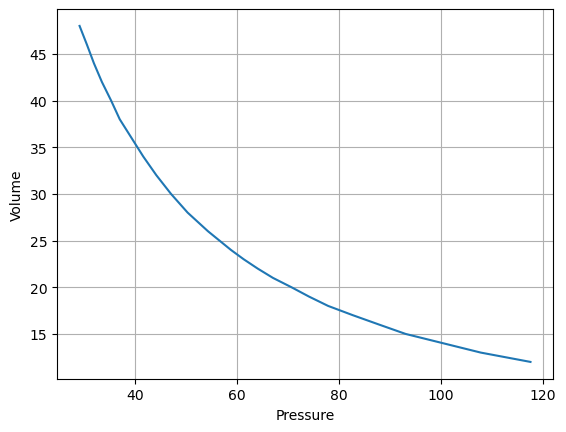

In [58]:
# create and show pressure vs. volume plot
plt.plot(df['Pressure'], df['Volume'])  # create plot
plt.xlabel('Pressure')  # add x-axis label
plt.ylabel('Volume')  # add y-axis label
plt.grid()  # add gridlines
plt.show()  # show plot

In [21]:
import numpy as np

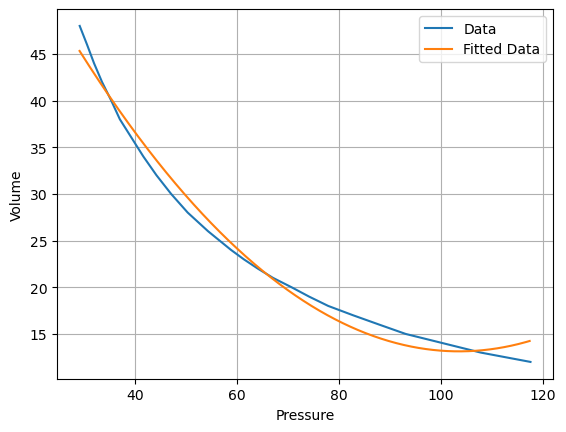

In [57]:
# fit data to a second order polynomial
coeffs = np.polyfit(df['Pressure'], df['Volume'], 2)  # get coefficients for quadratic fit
fit = np.poly1d(coeffs)  # get polynomial from coefficients
x_fit = np.arange(29.1, 117.5, .1)  # set domain for fit
y_fit = fit(x_fit)  # obtain result of quadratic for each value in x_fit

# display data with legend
plt.plot(df['Pressure'], df['Volume'], label="Data")  # plot data
plt.plot(x_fit, y_fit, label='Fitted Data')  # plot fit
plt.xlabel('Pressure')  # add x-axis label
plt.ylabel('Volume')  # add y-axis label
plt.legend() # add legend
plt.grid()  # add gridlines
plt.show()  # show plot

In [49]:
from IPython.display import display, Math

In [62]:
# display curve equation
display(Math(r'$y = 0.005805x^{2} - 1.202x + 75.39$'))

# From Boyle's law, volume decreases as pressure increases. For an ideal gas, this would occur linearly,
# and since a linear fit would likely be worse for this data, there is obvious deviation from ideal gas behavior.

<IPython.core.display.Math object>

In [87]:
# calculate RMSE for quadradic fit
fit_vals = np.array(fit(df['Pressure']))  # get fitted values across pressure data and put in NumPy array
vals = np.array(df['Volume'])  # put volume data in NumPy array
rmse = np.mean(np.sqrt((fit_vals - vals) ** 2))  # calculate rmse
print(f'RMSE = {rmse}:.2f')

RMSE = 1.082545911743917:.2f


In [82]:
# This is a relatively low root mean square error value, but still shows that the average distance between 
# two points is 1.

In [84]:
# calculate RMSE for linear fit
coeffs1 = np.polyfit(df['Pressure'], df['Volume'], 1)  # get coefficients for linear fit
fit1 = np.poly1d(coeffs1)  # get polynomial from coefficients
fit_vals1 = np.array(fit1(df['Pressure']))  # get fitted values across pressure data and put in NumPy array
rmse1 = np.mean(np.sqrt((fit_vals1 - vals) ** 2))  # calculate rmse for linear fit
print('RMSE = ' + str(rmse1))

RMSE = 3.3041534537351316


In [79]:
# Obviously, assuming ideal behavior is not a good choice.

In [85]:
# calculate RMSE for cubic fit
coeffs3 = np.polyfit(df['Pressure'], df['Volume'], 3)  # get coefficients for cubic fit
fit3 = np.poly1d(coeffs3)  # get polynomial from coefficients
fit_vals3 = np.array(fit3(df['Pressure']))  # get fitted values across pressure data and put in NumPy array
rmse3 = np.mean(np.sqrt((fit_vals3 - vals) ** 2))  # calculate rmse for cubic fit
print('RMSE = ' + str(rmse3))

RMSE = 0.3837852220589852


In [80]:
# A cubic fit could improve the model, but may be over-fitting.